# Chicago Uber/Lyft Trips Before/After COVID-19

- 🤠 Authors: 
    - Unnati Narang (unnati@illinois.edu)
    - Ye Joo Park (ypark32@illinois.edu)
- ✏️ Last updated on 9/26/2023

![Case Study Cover Image](https://github.com/bdi475/images/blob/main/case-studies/rideshare-trips/chicago-rideshare-trips-cover-image.jpg?raw=true)

This is a Python Jupyter notebook that can be run in a Colab environment. This notebook is designed to be used as a demonstration of plotly interactive visualizations in MBA 562.

You can follow through by running the code cells sequentially.

### 🐢 The dataset

- The original dataset contains information about 170 million ridesharing trips reported to the city of Chicago between 2018 and 2021. That translates to over 40GB of raw data. 🙀☠️🙀
- **Approximately 1% of the original data has been randomly sampled**, preprocessed, and compressed.
- Only 2019 and 2020 data have been selected.

### ⚔️ Your goal

Analyze the dataset and answer the following questions:

- 👉 How has the COVID-19 affected the total number of trips in 2019 and 2020?
- 👉 How has the COVID-19 affected the number of monthly trips?
- 👉 Have passengers become more generous or frugal when tipping during the pandemic?
- 👉 What were the trip dimensions (trip duration, distance, and fare) of rides taken place right before the July 4th fireworks in 2019 and 2020?
- 👉 Are passengers pooling rides during the pandemic?
- 👉 What are the top 20 pickup areas (by volume)?
- 👉 What are the average trip total for each of the top 20 pickup area?
- 👉 Is there any area that has an unusally large trip total?

---

### 🔨 Import packages and dataset

▶️ Run the code cell below to import packages used in the case.

In [1]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objects as go

# plotly.io is a low-level interface for interacting with figures/
# plotly.io.templates lists available plotly templates
# https://plotly.com/python-api-reference/plotly.io.html
import plotly.io as pio

pd.set_option('display.max_columns', 50)

#### 🧭 Check Plotly Version

Run the code below to ensure that your notebook uses the same Plotly version as the autograder.

In [2]:
print(f'The current plotly version is {plotly.__version__}')

The current plotly version is 5.11.0


▶️ Run the code below to import and process the trips dataset.

In [3]:
# read the trips dataset and uncompress gzip
# parse the "start" column as datetime
df = pd.read_csv(
    'https://github.com/bdi475/datasets/raw/main/case-studies/chicago-ridesharing/chicago-ridesharing-trips-2019-2020.csv.gz',
    compression='gzip',
    parse_dates=['start']
)

# read community areas information
df_community_areas = pd.read_csv('https://github.com/bdi475/datasets/raw/main/case-studies/chicago-ridesharing/chicago-community-area-numbers.csv')

# replace community area numbers with area names
df = df.merge(df_community_areas, left_on='pickup_area', right_on='area_number', how='left')
df['pickup_area'] = df['community'].copy()
df.drop(columns=['community', 'area_number'], inplace=True)

df = df.merge(df_community_areas, left_on='dropoff_area', right_on='area_number', how='left')
df['dropoff_area'] = df['community'].copy()
df.drop(columns=['community', 'area_number'], inplace=True)

---

## 📐 Part 1: Data overview

---

### 🎯 1.1 Display first 5 rows

In [4]:
# similar to R tibble's head() function
df.head(5)

start  trip_seconds  trip_miles      pickup_area     dropoff_area  \
0 2019-01-01           303         1.4   Garfield Ridge         Clearing   
1 2019-01-01           697         3.0  Near North Side   Near West Side   
2 2019-01-01          1598         4.7     Lincoln Park             Loop   
3 2019-01-01           573         0.9  Near North Side  Near North Side   
4 2019-01-01          1562         2.4  Near North Side  Near North Side   

   fare  tip  additional_charges  trip_total  shared_trip_authorized  \
0   5.0  5.0                7.68       17.68                   False   
1   7.5  0.0                2.50       10.00                   False   
2  10.0  2.0                2.50       14.50                   False   
3   5.0  0.0                2.50        7.50                   False   
4  10.0  0.0                2.50       12.50                   False   

   trips_pooled  pickup_lat  pickup_lon  dropoff_lat  dropoff_lon  
0             1   41.792592  -87.769615    41.779583   -87.768511  
1             1   41.892073  -87.628874    41.885300   -87.642808  
2             1   41.922083  -87.634156    41.870607   -87.622173  
3             1   41.892042  -87.631864    41.892508   -87.626215  
4             1   41.900221  -87.629105    41.895033   -87.619711

---

### 🎯 1.2: Summary of the DataFrame

In [5]:
# df.info() is similar to R's str() function
# in Python, the str() function casts an object to a string type
# in R, the str() function displays the structure of an object
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1388193 entries, 0 to 1388192
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   start                   1388193 non-null  datetime64[ns]
 1   trip_seconds            1388193 non-null  int64         
 2   trip_miles              1388193 non-null  float64       
 3   pickup_area             1388193 non-null  object        
 4   dropoff_area            1388193 non-null  object        
 5   fare                    1388193 non-null  float64       
 6   tip                     1388193 non-null  float64       
 7   additional_charges      1388193 non-null  float64       
 8   trip_total              1388193 non-null  float64       
 9   shared_trip_authorized  1388193 non-null  bool          
 10  trips_pooled            1388193 non-null  int64         
 11  pickup_lat              1388193 non-null  float64       
 12  pickup_lon    

---

### 🎯 1.3: Number of rows and columns in the dataset

In [6]:
# similar to R's nrow() and ncol() functions
# the shape property contains the number of rows and columns
num_rows = df.shape[0]
num_cols = df.shape[1]

# alternatively, use unpacking syntax to combine the two lines into one
# num_rows, num_cols = df.shape

print(f'There are {num_rows} rows and {num_cols} columns in the dataset.')

There are 1388193 rows and 15 columns in the dataset.


---

## 🗓️ Part 2: Extract datetime values into separate columns

The `start` column contains trip start timestamps. We will extract year, month, day of the month, day of the week, hour, and weekday/weekend information into separate columns.

---

### 🎯 2.1: Extract date components into separate columns

In [7]:
# the .dt accessor is similar to R lubridate's getter functions
# example: lubridate::month(date_column) is equivalent to date_column.dt.month
df['year'] = df['start'].dt.year
df['month'] = df['start'].dt.month
df['day'] = df['start'].dt.day
df['dayofweek'] = df['start'].dt.dayofweek
df['hour'] = df['start'].dt.hour

df_sample = df[df.index.isin([400000, 600000, 800000, 1000000, 1200000])]
display(df_sample[['start', 'year', 'month', 'day', 'dayofweek', 'hour']])

start  year  month  day  dayofweek  hour
400000  2019-05-28 19:00:00  2019      5   28          1    19
600000  2019-08-12 19:15:00  2019      8   12          0    19
800000  2019-10-29 08:00:00  2019     10   29          1     8
1000000 2020-01-15 12:45:00  2020      1   15          2    12
1200000 2020-06-09 17:00:00  2020      6    9          1    17

---

### 🎯 2.2: Create `weekday_weekend` column

- ✔️ Assume Mondays-Thursdays are weekdays and Fridays-Sundays are weekends.
- ✔️ Create a new column named `weekday_weekend` in `df`.

In [8]:
# numpy's np.where() is similar to R's ifelse() function
df['weekday_weekend'] = np.where(df['dayofweek'] <= 3, 'weekday', 'weekend')

display(df[['dayofweek', 'weekday_weekend']].sample(5))

dayofweek weekday_weekend
1313773          4         weekend
445297           5         weekend
619067           1         weekday
1293873          6         weekend
266844           1         weekday

---

## 😷 Part 3: Visualize the effects of COVID-19 on the volume of ridesharing trips

Although the first case of COVID-19 was reported in January 2020 in the United States, people started to take it seriously in March 2020.

How did COVID-19 affect the volume of ridesharing trips? 💨 Let's visualize and compare the monthly number of trips for both 2019 and 2020.

---

### 🎯 3.1: Total number of trips in 2019 and 2020

In [9]:
num_2019_trips = (df['year'] == 2019).sum()
num_2020_trips = (df['year'] == 2020).sum()

print(f'There were {num_2019_trips} trips in 2019.')
print(f'There were {num_2020_trips} trips in 2020.')
print(f'The number of trips decreased by {(num_2019_trips - num_2020_trips) / num_2019_trips * 100:.1f}%.')

There were 966346 trips in 2019.
There were 421847 trips in 2020.
The number of trips decreased by 56.3%.


---

### 🎯 3.2: Monthly number of trips and tip percentage

Calculate the number of monthly trips and average tip percentages.

In [10]:
df_monthly = df.groupby(['year', 'month'], as_index=False).agg({
    'start': 'count',
    'tip': 'sum',
    'fare': 'sum',
}).rename(columns={
    'start': 'num_trips'
})

# Calculate average tip %
df_monthly['tip_pct'] = df_monthly['tip'] / df_monthly['fare']

# Remove tip and fare columns since they're not needed anymore
df_monthly.drop(columns=['tip', 'fare'], inplace=True)

display(df_monthly.head(5))

year  month  num_trips   tip_pct
0  2019      1      77313  0.048254
1  2019      2      77374  0.045353
2  2019      3      89688  0.047561
3  2019      4      79829  0.047786
4  2019      5      84168  0.049438

---

### 🎯 3.3: Monthly number of trips in 2019 and 2020 (facet grid bar chart)

Create two bar charts side-by-side within a same figure showing the number of monthly trips for 2019 and 2020.

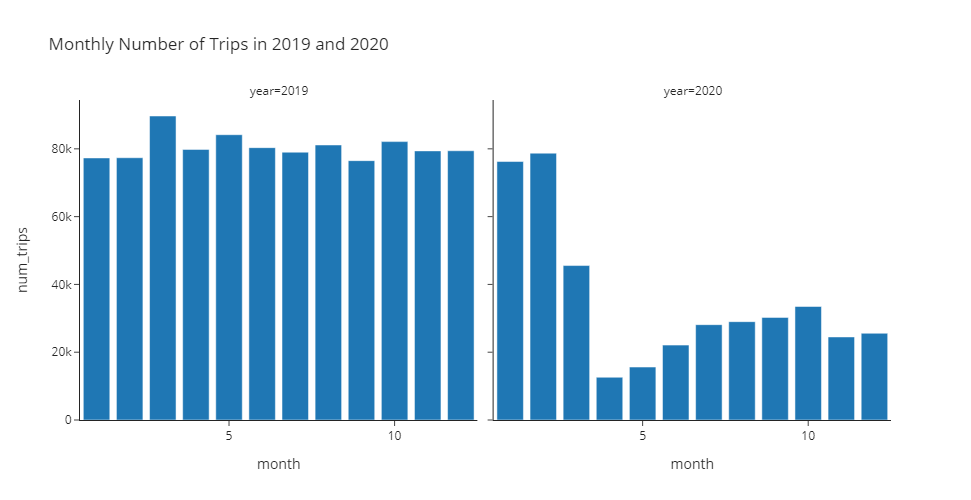

In [11]:
fig = px.bar(
    df_monthly,
    title='Monthly Number of Trips in 2019 and 2020',
    x='month',
    y='num_trips',
    facet_col='year',
    width=1000,
    height=500,
    template='simple_white',
)
fig.show()

---

### 🎯 3.4: Monthly number of trips in 2019 and 2020 (line plot)

Create a line plot of monthly number of trips. Use `year` to create two separate lines (encoded by different colors) for 2019 and 2020.

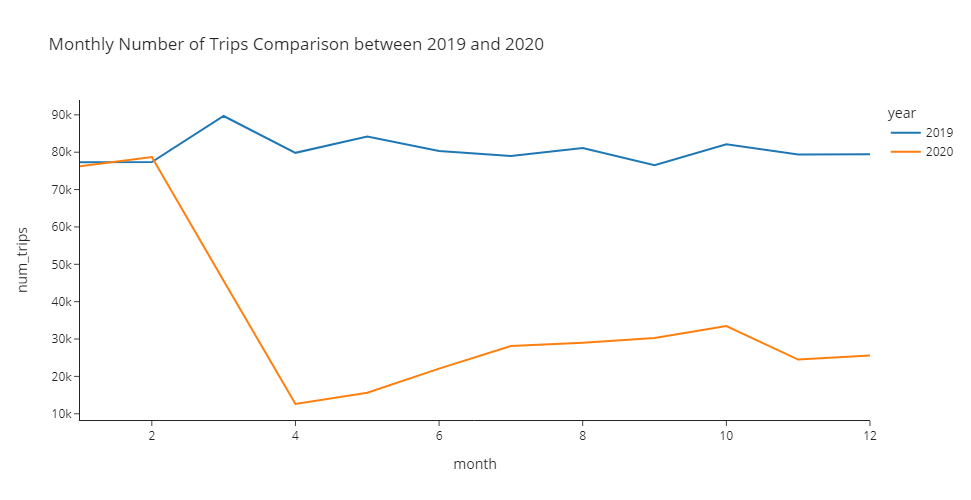

In [12]:
fig = px.line(
    df_monthly,
    title='Monthly Number of Trips Comparison between 2019 and 2020',
    x='month',
    y='num_trips',
    color='year',
    template='simple_white',
    width=800,
    height=500
)

fig.show()

---

### 📌 Interpreting the pre-covid vs post-covid monthly number of trips

- 🔍 In March 2020, the number of trips have plummeted due to the widespread outbreak of COVID-19.
- 🔍 April 2020 was the worst month for ridesharing drivers.
- 🔍 The number of trips have slowly increased from April to October.
- 🔍 In November 2020, continued surge in the number of COVID-19 cases has caused the number of trips to go down again.

---

## 💵 Part 4: Visualize the effect of COVID-19 on tips

Did passengers tip more on average during the pandemic since they appreciated the drivers providing services during risky times?

Or did the passengers tip less on average since the pandemic has devastated the nation's economy in 2020?

---

### 🎯 4.1: Monthly average tip percentages in 2019 and 2020 (facet grid bar chart)

Create two bar charts side-by-side within a same figure showing the monthly average tip percentages in 2019 and 2020.

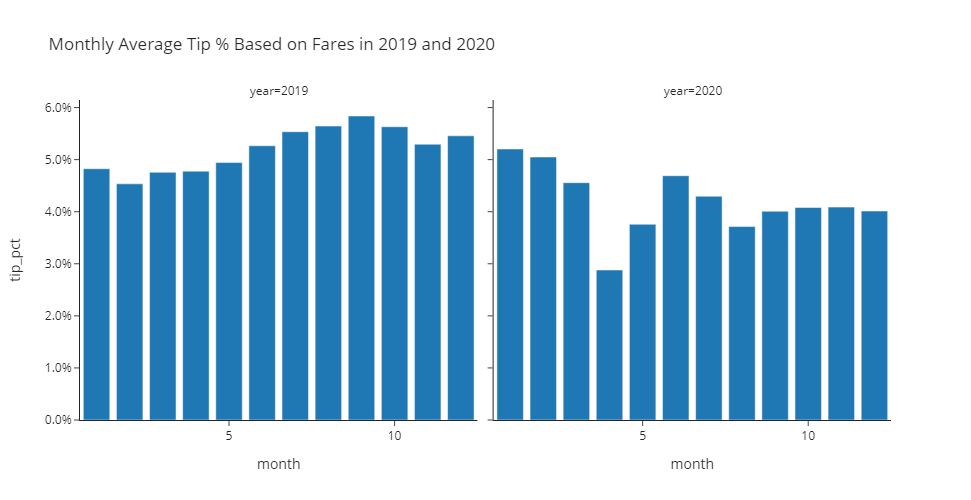

In [13]:
fig = px.bar(
    df_monthly,
    title='Monthly Average Tip % Based on Fares in 2019 and 2020',
    x='month',
    y='tip_pct',
    facet_col='year',
    width=1000,
    height=500,
    template='simple_white',
)
fig.update_layout(yaxis_tickformat=',.1%')
fig.update_layout(yaxis2_tickformat=',.1%')
fig.show()

---

### 🎯 4.2: Monthly average tip percentages in 2019 and 2020

Create a line plot of monthly average tip percentages. Use `year` to create two separate lines (encoded by different colors) for 2019 and 2020.

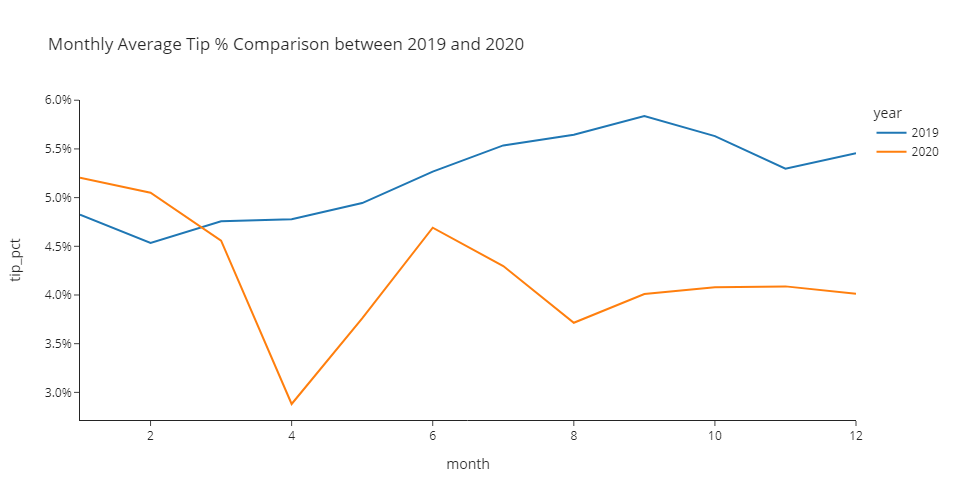

In [14]:
fig = px.line(
    df_monthly,
    title='Monthly Average Tip % Comparison between 2019 and 2020',
    x='month',
    y='tip_pct',
    color='year',
    template='simple_white',
    width=800,
    height=500
)
fig.update_layout(yaxis_tickformat=',.1%')
fig.show()

---

### 📌 Interpreting the pre-covid vs post-covid average percentage of tips

- 🔍 Passengers tipped less after the COVID-19 outbreak.
- 🔍 Possible explanations:
    - COVID-19 has caused an economic downturn.
    - Many people have also lost jobs during this period.
    - COVID-19 may have prevented the driver and the passenger(s) from having a conversation. Less conversation could result in less tips.

---

## ✨ Part 5: Trips right before July 4th fireworks

Every July 4th, massive crowds gather around places (or boats) to view the fireworks. How did July 4th become the "national fireworks day"? July 4, 1776 is considered to be the birth of United States of Amercia as an independent nation. The Continental Congress approved the final wording of the Declaration of Independence on July 4, 1776. The first-ever recorded July 4th fireworks celebration was held in Philadelphia on July 4, 1777. Since then, there hasn't been an Independence Day without a firework. 💥💥 

[[Source 1]](https://www.constitutionfacts.com/us-declaration-of-independence/fourth-of-july/#:~:text=We%20celebrate%20American%20Independence%20Day,America%20as%20an%20independent%20nation.) [[Source 2]](https://www.bhg.com/holidays/july-4th/traditions/why-fireworks-on-fourth-of-july/#:~:text=Ever%20since%20Americans%20have%20proudly,sky%20every%20Fourth%20of%20July.&text=The%20Fourth%20of%20July%20celebrates,the%20Continental%20Congress%20in%201776.)

In this part, you will find trips started on July 4th between 5-6 PM and create different scatter plots based on those trips.

---

### 🎯 5.1: Filter July 4th 5-6 PM trips

In [15]:
df_july_fourth = df[(df['month'] == 7) & (df['day'] == 4) & (df['hour'] == 17)]

display(df_july_fourth.sample(3))

start  trip_seconds  trip_miles   pickup_area  \
496976 2019-07-04 17:00:00           265         0.9  Logan Square   
496945 2019-07-04 17:00:00          1687         7.3        Uptown   
497078 2019-07-04 17:45:00           529         2.5     West Town   

        dropoff_area  fare  tip  additional_charges  trip_total  \
496976  Logan Square   7.5  0.0                0.00        7.50   
496945  Logan Square  15.0  0.0                2.55       17.55   
497078  Logan Square   7.5  0.0                2.55       10.05   

        shared_trip_authorized  trips_pooled  pickup_lat  pickup_lon  \
496976                    True             1   41.915741  -87.692256   
496945                   False             1   41.962179  -87.645379   
497078                   False             1   41.899422  -87.684490   

        dropoff_lat  dropoff_lon  year  month  day  dayofweek  hour  \
496976    41.920452   -87.679955  2019      7    4          3    17   
496945    41.915496   -87.710196  2019      7    4          3    17   
497078    41.921126   -87.699754  2019      7    4          3    17   

       weekday_weekend  
496976         weekday  
496945         weekday  
497078         weekday

---

### 🎯 5.2: July 4th 5-6 PM trips scatter plots

Create two scatter plots for each year side-by-side within a same figure with the following axes.

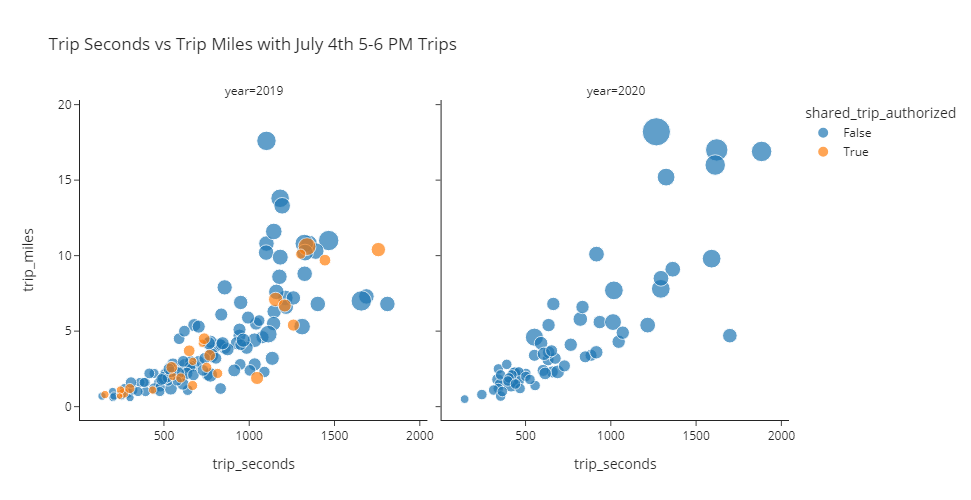

In [16]:
fig = px.scatter(
    df_july_fourth,
    title='Trip Seconds vs Trip Miles with July 4th 5-6 PM Trips',
    x='trip_seconds',
    y='trip_miles',
    size='trip_total',
    facet_col='year',
    color='shared_trip_authorized',
    template='simple_white',
    width=1200,
    height=500,
)
fig.show()

---

### 📌 Interpreting the pre-covid vs post-covid scatter plots

- 🔍 There is a positive linear relationship between `trip_seconds` and `trip_miles`.
- 🔍 The number of trips made on July 4th has decreased signifcantly in 2020 due to COVID-19.
- 🔍 There are no pooled trips (`shared_trips_authorized == True`) in 2020. 
    - Why? Uber and Lyft both suspended pooled rides to limit the spread of coronavirus ([Reuters article here](https://www.reuters.com/article/us-health-coronavirus-uber/uber-lyft-suspend-pooled-rides-in-u-s-canada-to-limit-spread-of-coronavirus-idUSKBN214192)) beginning in March 2020.

---

### 🎯 5.3: July 4th 5-6 PM trips 3D scatter plots (Pre-COVID)

Create a 3D scatter plot of trips **in 2019**.

⚠️ The 3D scatter plot is only used as a demonstration. You should avoid unnecessary 3D plots at all costs unless you're plotting spatial or scientific data.

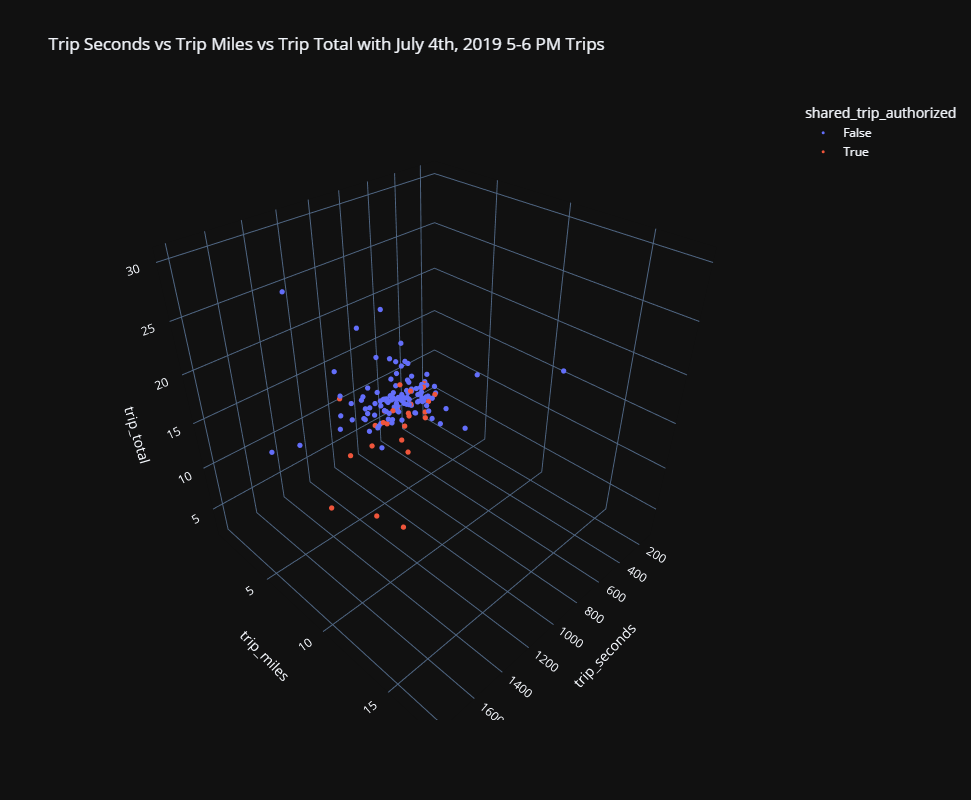

In [17]:
fig = px.scatter_3d(
    df_july_fourth[df_july_fourth['year'] == 2019],
    title='Trip Seconds vs Trip Miles vs Trip Total with July 4th, 2019 5-6 PM Trips',
    x='trip_seconds',
    y='trip_miles',
    z='trip_total',
    color='shared_trip_authorized',
    template='plotly_dark',
    width=800,
    height=800
)
fig.update_traces(marker_size = 3)
fig.show()

Create a 3D scatter plot of trips **in 2020**.

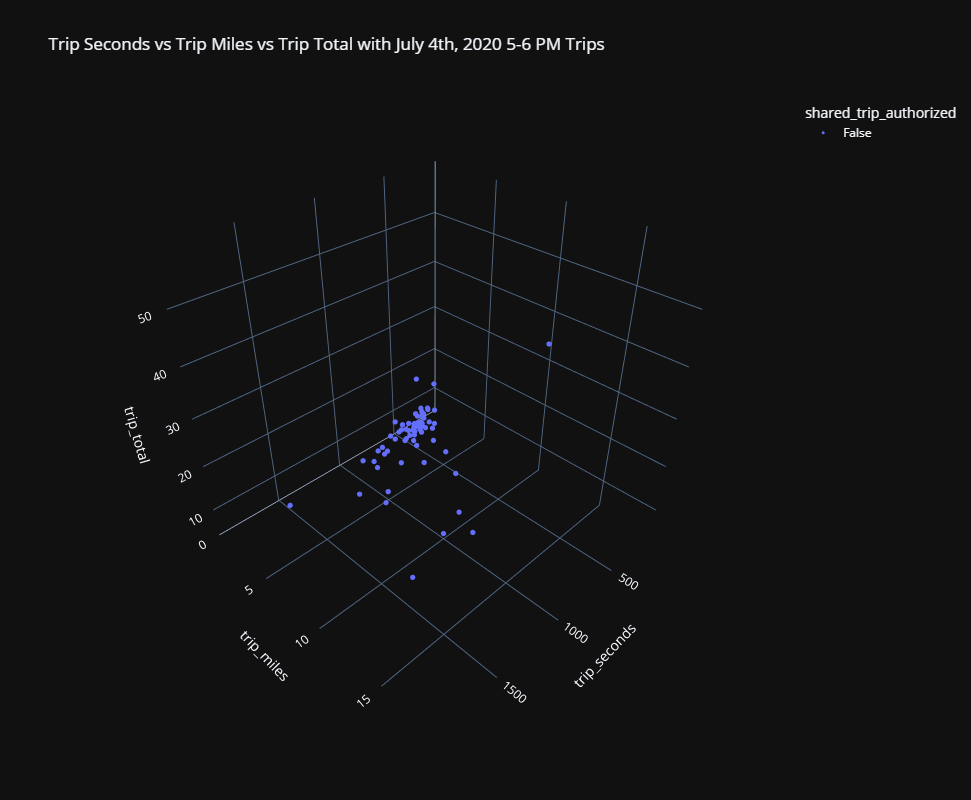

In [18]:
fig = px.scatter_3d(
    df_july_fourth[df_july_fourth['year'] == 2020],
    title='Trip Seconds vs Trip Miles vs Trip Total with July 4th, 2020 5-6 PM Trips',
    x='trip_seconds',
    y='trip_miles',
    z='trip_total',
    color='shared_trip_authorized',
    template='plotly_dark',
    width=800,
    height=800
)
fig.update_traces(marker_size = 3)
fig.show()

---

### 📌 Interpreting the pre-covid vs post-covid 3D scatter plots

- 🔍 There is a positive linear relationship between `trip_seconds`, `trip_miles`, and `trip_total`.
- 🔍 You may have to rotate the view of your 3D scatter plots to witness the linear relationship.

---

## 🏡 Part 6: Pickup/dropff areas analysis

In this part, you will find the top 20 pickup areas and analyze the trips originating from those areas.

---

### 🎯 6.1: Filter trips from top 20 pickup areas

Filter only the rows where the `pickup_area` is in one of the top 20 pickup areas.

In [19]:
top_20_pickup_areas = df['pickup_area'].value_counts().head(20).index.tolist()
df_filtered = df[df['pickup_area'].isin(top_20_pickup_areas)]

display(df_filtered.head(3))
print(f'There are {df_filtered.shape[0]} rows and {df_filtered.shape[1]} columns in the filtered DataFrame')

start  trip_seconds  trip_miles      pickup_area     dropoff_area  \
1 2019-01-01           697         3.0  Near North Side   Near West Side   
2 2019-01-01          1598         4.7     Lincoln Park             Loop   
3 2019-01-01           573         0.9  Near North Side  Near North Side   

   fare  tip  additional_charges  trip_total  shared_trip_authorized  \
1   7.5  0.0                 2.5        10.0                   False   
2  10.0  2.0                 2.5        14.5                   False   
3   5.0  0.0                 2.5         7.5                   False   

   trips_pooled  pickup_lat  pickup_lon  dropoff_lat  dropoff_lon  year  \
1             1   41.892073  -87.628874    41.885300   -87.642808  2019   
2             1   41.922083  -87.634156    41.870607   -87.622173  2019   
3             1   41.892042  -87.631864    41.892508   -87.626215  2019   

   month  day  dayofweek  hour weekday_weekend  
1      1    1          1     0         weekday  
2      1    1          1     0         weekday  
3      1    1          1     0         weekday

There are 1084442 rows and 21 columns in the filtered DataFrame


---

### 🎯 6.2: Number of trips and average trip total by pickup_area

Calculate the following total number of trips and average trip total by pickup area

In [20]:
df_by_pickup_area = df_filtered.groupby(
    'pickup_area', as_index=False
).agg({
    'start': 'count',
    'trip_total': 'mean',
}).rename(columns={
    'start': 'num_trips'
})

display(df_by_pickup_area.head(5))

pickup_area  num_trips  trip_total
0       Austin      16851   13.246273
1     Avondale      16425   12.623803
2    Edgewater      21689   13.867470
3    Hyde Park      21303   14.523999
4  Irving Park      14570   13.326660

---

### 🎯 6.3: Number of trips by pickup area (bar chart)

Create a horizontal bar chart displaying the number of trips by each pickup area.

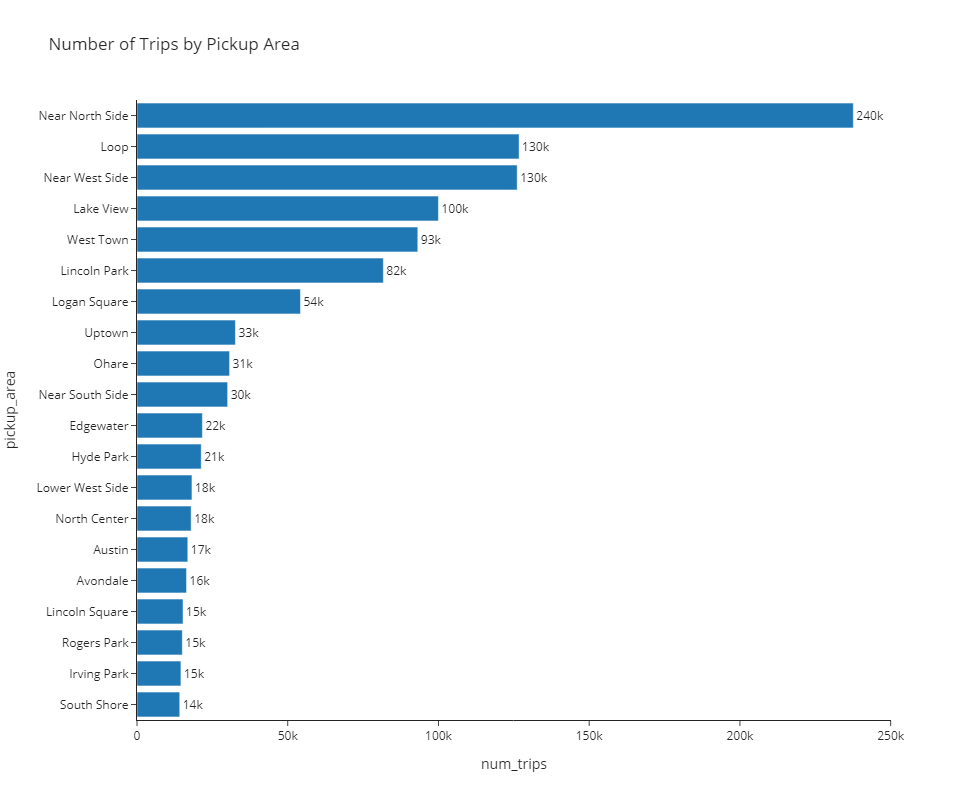

In [21]:
fig = px.bar(
    df_by_pickup_area,
    title='Number of Trips by Pickup Area',
    x='num_trips',
    y='pickup_area',
    # color='num_trips',
    # color_continuous_scale='emrld',
    text='num_trips',
    template='simple_white',
    height=800
)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_yaxes(categoryorder='total ascending')
fig.show()

---

### 🎯 6.4: Number of trips by pickup area (treemap)

Create a treemap of pickup areas.

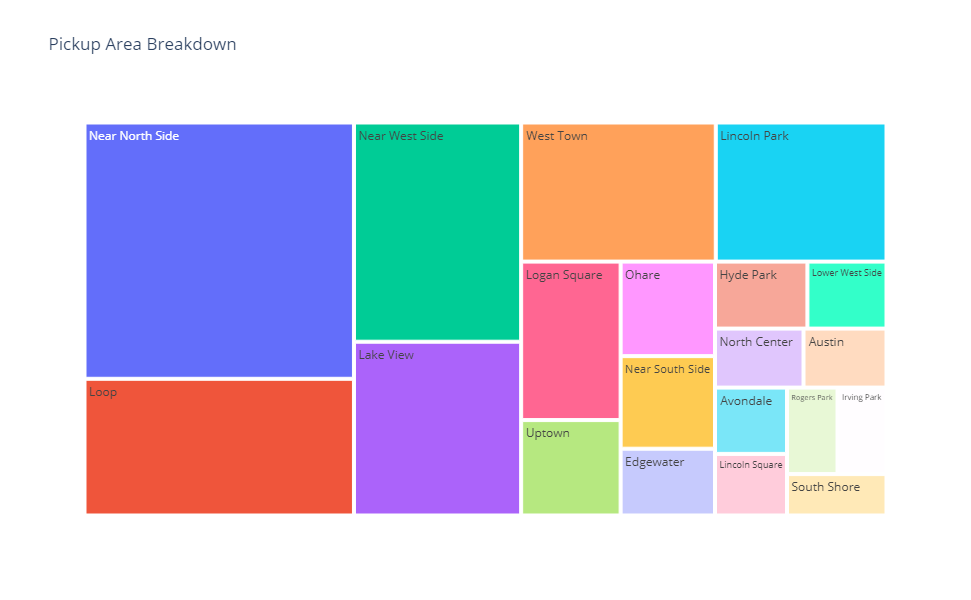

In [22]:
fig = px.treemap(
    df_by_pickup_area,
    title='Pickup Area Breakdown',
    path=['pickup_area'],
    values='num_trips',
    height=600
)
fig.show()

---

### 📌 Interpreting the pickup area visualizations

- 🔍 "Near North Side" is the most popular pickup area, followed by "Loop" and "Near West Side".
- 🔍 The average trip total for rides beginning in Ohare is relatively much higher compared to any other pickup area.

---

## 🦄 Part 7: Pickup area + weekday/weekend

In this part, you will add a new dimension (weekday/weekend) to the top 20 pickup areas.

---

### 🎯 7.1: Number of trips and average trip total by pickup area + weekday/weekend

Calculate the trip statistics by pickup area and weekday/weekend classification.

In [23]:
df_by_pickup_area_weekday_weekend = df_filtered.groupby(
    ['pickup_area', 'weekday_weekend'], as_index=False
).agg({
    'start': 'count',
    'trip_total': 'mean',
}).rename(columns={
    'start': 'num_trips'
})

display(df_by_pickup_area_weekday_weekend.head(10))

pickup_area weekday_weekend  num_trips  trip_total
0       Austin         weekday       9064   13.213864
1       Austin         weekend       7787   13.283996
2     Avondale         weekday       7942   12.617546
3     Avondale         weekend       8483   12.629662
4    Edgewater         weekday      10745   14.131752
5    Edgewater         weekend      10944   13.607994
6    Hyde Park         weekday      11852   14.162735
7    Hyde Park         weekend       9451   14.977041
8  Irving Park         weekday       7307   13.409209
9  Irving Park         weekend       7263   13.243611

---

### 🎯 7.2: Pickup area + weekday/weekend breakdown (sunburst)

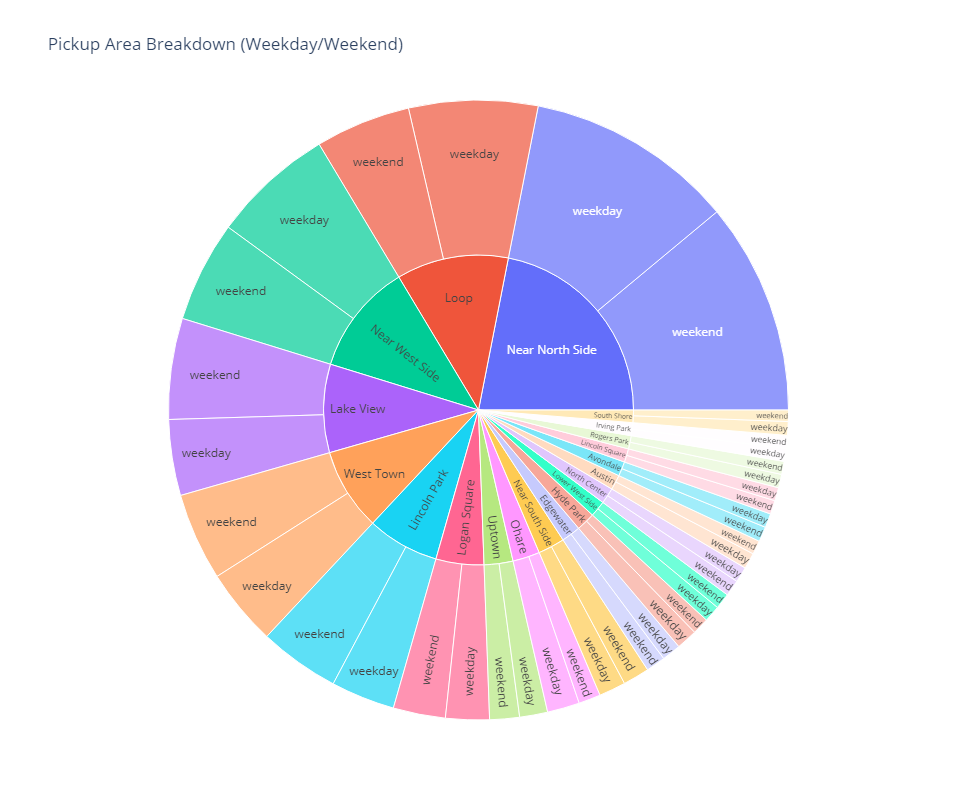

In [24]:
fig = px.sunburst(
    df_by_pickup_area_weekday_weekend,
    path=['pickup_area', 'weekday_weekend'],
    values='num_trips',
    title='Pickup Area Breakdown (Weekday/Weekend)',
    width=800,
    height=800
)
fig.show()

---

### 🎯 7.3: Pickup area + weekday/weekend breakdown (treemap)

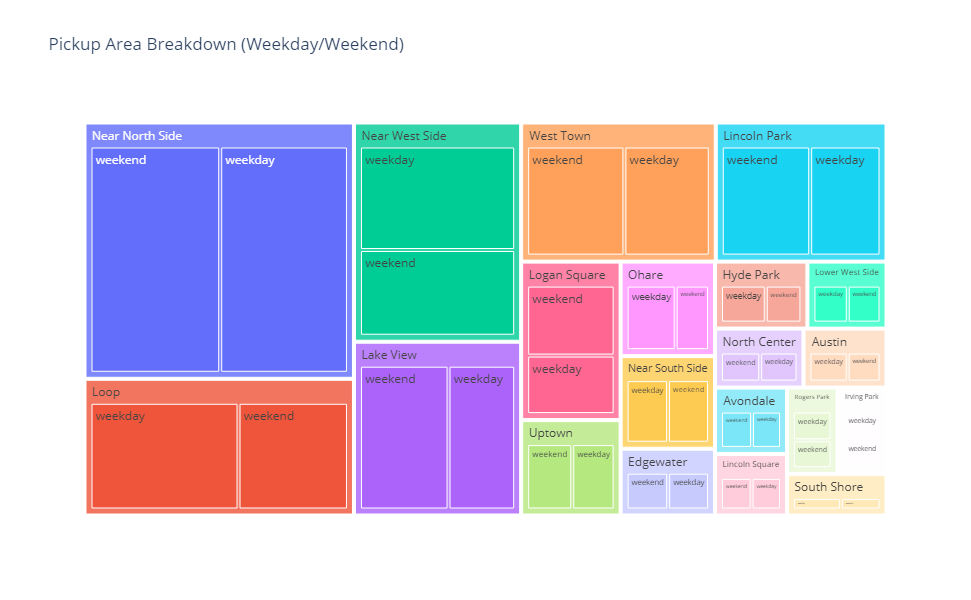

In [25]:
fig = px.treemap(
    df_by_pickup_area_weekday_weekend,
    path=['pickup_area', 'weekday_weekend'],
    values='num_trips',
    title='Pickup Area Breakdown (Weekday/Weekend)',
    height=600
)
fig.show()